Data Import

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
data1_raw = pd.read_csv("F:\Protein Sequence Classification\pdb_data_no_dups.csv")
data2_raw = pd.read_csv("F:\Protein Sequence Classification\pdb_data_seq.csv")

data1 = data1_raw.copy()
data2 = data2_raw.copy()

Data Preprocessing

In [62]:
data1_feature = ['resolution','residueCount','structureMolecularWeight','densityMatthews','densityPercentSol','phValue','experimentalTechnique','macromoleculeType']
data1_year = data1['publicationYear']
data1_index = data1['structureId']
data1_lebel = data1['classification']

row1, col1 = data1.shape
row2, col2 = data2.shape

In [63]:
# dropping unnecessary columns
drop_column = []
for i in data1.columns:
    if i not in data1_feature:
        drop_column.append(i)

data1 = data1.drop(columns=drop_column)

In [64]:
# converting catagorical columns to numerical value
label_encoder = LabelEncoder()
label1 = label_encoder.fit_transform(data1['macromoleculeType'])
label1 = pd.DataFrame(label1, columns=['macromoleculeType_encoded'])
label2 = label_encoder.fit_transform(data1['experimentalTechnique'])
label2 = pd.DataFrame(label2, columns=['experimentalTechnique_encoded'])
data1 = data1.join(label1)
data1 = data1.join(label2)

data1 = data1.drop(columns=['macromoleculeType','experimentalTechnique'])       #dropping the catagorical columns
data1 

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,macromoleculeType_encoded,experimentalTechnique_encoded
0,20,1.90,6360.30,1.78,30.89,7.0,3,29
1,24,2.25,7939.35,2.00,38.45,NaN,0,29
2,154,2.07,18112.80,3.09,60.20,9.0,4,29
3,24,2.20,7637.17,2.28,46.06,7.0,0,29
4,165,1.74,18926.61,2.75,55.28,NaN,4,29
...,...,...,...,...,...,...,...,...
141396,932,2.60,101838.68,2.38,48.29,NaN,4,29
141397,0,NaN,24244.34,3.17,61.18,NaN,13,29
141398,342,1.80,34270.22,2.50,50.76,NaN,4,29
141399,388,1.90,43542.29,2.79,55.93,NaN,4,29


residueCount                      0.000000
resolution                        9.060756
structureMolecularWeight          0.000000
densityMatthews                  11.794117
densityPercentSol                11.776437
phValue                          25.665306
macromoleculeType_encoded         0.000000
experimentalTechnique_encoded     0.000000
dtype: float64


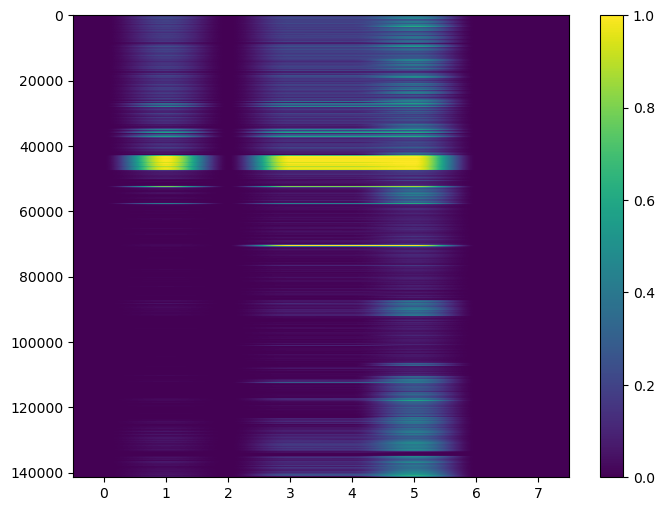

In [65]:
# missing values handle
missing_values = data1.isnull()          # missing value percent
print((missing_values.sum()/row1)*100)              # percentage 

# heatmap to visualize the missing data
plt.figure(figsize=(8, 6))
plt.imshow(missing_values, aspect='auto', cmap='viridis')
plt.colorbar()

In [66]:
# separating missing value columns with no missing value columns
missing = data1.columns[data1.isnull().any()]
no_missing = []
for i in data1.columns:
    if i not in missing:
        no_missing.append(i)
knn_data1 = data1[missing]

# Handling missing value with KNN and SimpleImputer
scaler = StandardScaler()
knn_data1 = pd.DataFrame(scaler.fit_transform(knn_data1))     #scaling the data first

# KNN
knn = KNNImputer(n_neighbors=5)
knn_data1 = pd.DataFrame(knn.fit_transform(knn_data1))

In [67]:
# scaling the non_missing columns
scaler = StandardScaler()
scale_data1 = pd.DataFrame(scaler.fit_transform(data1[no_missing]))
data1 = pd.concat([scale_data1, knn_data1], axis=1)

In [68]:
# rename all the columns again
data1.rename(columns=dict(zip(data1.columns, data1_feature)), inplace=True)
data1

,densityPercentSol,phValue,experimentalTechnique,macromoleculeType,densityPercentSol,phValue,experimentalTechnique,macromoleculeType
0,-0.376968,-0.185813,-0.774533,0.308056,-0.257859,-1.135926,-2.025149,0.082648
1,-0.375096,-0.183037,-2.474043,0.308056,-0.009786,-0.855219,-1.276969,0.215626
2,-0.314247,-0.165156,-0.208030,0.308056,-0.137367,0.535554,0.875533,0.864874
3,-0.375096,-0.183568,-2.474043,0.308056,-0.045225,-0.497956,-0.523841,0.082648
4,-0.309099,-0.163726,-0.208030,0.308056,-0.371264,0.101735,0.388622,-0.112909
...,...,...,...,...,...,...,...,...
141396,0.049908,-0.017998,-0.208030,0.308056,0.238287,-0.370363,-0.303148,-0.011219
141397,-0.386329,-0.154379,4.890499,0.308056,0.184420,0.637629,0.972519,-0.191131
141398,-0.226251,-0.136758,-0.208030,0.308056,-0.328737,-0.217250,-0.058703,-0.026864
141399,-0.204720,-0.120461,-0.208030,0.308056,-0.257859,0.152773,0.452949,-0.159842


In [87]:
# Prcessing data2
# converting or encoding the sequence of protein sequence

data2_label = data2['sequence']
data2_index = data2['structureId']

def generate_kmers(sequence, k):
    if isinstance(sequence, str) and k > 0 and k <= len(sequence):
        return [sequence[x:x+k].upper() for x in range(len(sequence) - k + 1)]
    else:
        return []

k = 3
kmer_docs = [" ".join(generate_kmers(str(seq), k)) for seq in data2_label]
vectorizer = CountVectorizer()
data2_label = vectorizer.fit_transform(kmer_docs)


In [91]:
print(data2_label)

  (0, 503)	2
  (0, 587)	2
  (0, 2342)	1
  (0, 2261)	1
  (0, 583)	1
  (0, 2257)	1
  (1, 503)	2
  (1, 587)	2
  (1, 2342)	1
  (1, 2261)	1
  (1, 583)	1
  (1, 2257)	1
  (2, 2261)	2
  (2, 583)	2
  (2, 582)	1
  (2, 2233)	1
  (2, 16)	1
  (2, 360)	1
  (2, 7413)	1
  (2, 7097)	1
  (3, 2261)	2
  (3, 583)	2
  (3, 582)	1
  (3, 2233)	1
  (3, 16)	1
  :	:
  (467303, 2766)	1
  (467303, 1930)	1
  (467303, 5609)	1
  (467303, 6309)	1
  (467303, 7682)	1
  (467303, 7725)	1
  (467303, 6612)	1
  (467303, 3119)	1
  (467303, 4394)	1
  (467303, 6263)	1
  (467303, 6861)	1
  (467303, 3999)	1
  (467303, 1342)	1
  (467303, 1908)	1
  (467303, 4082)	1
  (467303, 2444)	1
  (467303, 998)	1
  (467303, 1850)	1
  (467303, 5554)	1
  (467303, 3185)	1
  (467303, 7982)	1
  (467303, 5156)	1
  (467303, 5331)	1
  (467303, 4854)	1
  (467303, 5961)	1


In [69]:
'''
As there is 8 features, there is no need for feature selection
'''

'\nAs there is 8 features, there is no need for feature selection\n'

Model Building

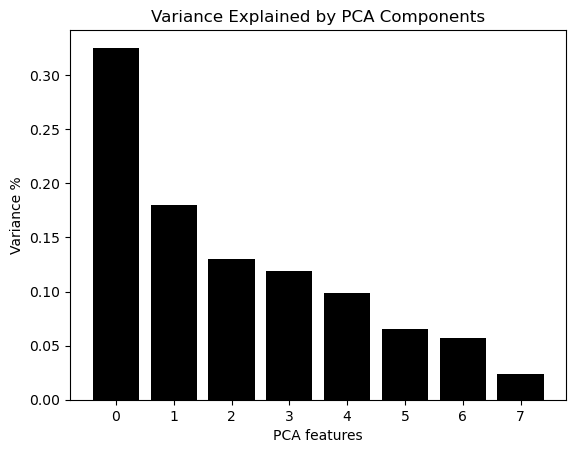

"\nAs the varience doesn't appears to have an elbow shape, PCA is not needed\n"

In [70]:
# PCA needed or not

pca = PCA().fit(data1)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title("Variance Explained by PCA Components")
plt.show() 

'''
As the varience doesn't appears to have an elbow shape, PCA is not needed
'''

Analyzing the Model

Optimization

Insights